# Building a Logistic Regression
#NAME VISHWANATH SOPAN TAWARE
#ROLL NO: 2012131


Create a logistic regression based on the bank data provided.

The data is based on the marketing campaign efforts of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

Note that the first column of the dataset is the index.

# Import the relevant libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
sns.set()

# this part not be needed after the latests updates of the library
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

# Load the data

In [2]:
raw_data = pd.read_csv('Example_bank_data.csv')
raw_data.head()

Unnamed: 0  duration    y
0           0       117   no
1           1       274  yes
2           2       167   no
3           3       686  yes
4           4       157   no

We want to know whether the bank marketing strategy was successful, so we need to transform the outcome variable into 0s and 1s in order to perform a logistic regression.

In [3]:
# We make sure to create a copy of the data before we start altering itNote that we don't change the original data we loaded.
data = raw_data.copy()

In [4]:
# Removes the index column that came with the data
data = data.drop(['Unnamed: 0'], axis = 1)
data.head()

duration    y
0       117   no
1       274  yes
2       167   no
3       686  yes
4       157   no

In [5]:
# We use the map function to change any 'yes' values to 1 and 'no' values to 0. 
data['y'] = data['y'].map({'yes':1, 'no':0})
data.head()

duration  y
0       117  0
1       274  1
2       167  0
3       686  1
4       157  0

In [6]:
# Check the descriptive statistics
data.describe()

duration           y
count   518.000000  518.000000
mean    382.177606    0.500000
std     344.295990    0.500483
min       9.000000    0.000000
25%     155.000000    0.000000
50%     266.500000    0.500000
75%     482.750000    1.000000
max    2653.000000    1.000000

# Declare the dependent and independent variables

In [7]:
y = data['y']
x1 = data['duration']

# Simple Logistic Regression

Run the regression and visualize it on a scatter plot (no need to plot the line).

In [8]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()
# Get the regression summary
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.546118
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      516
Method:                           MLE   Df Model:                            1
Date:                Tue, 22 Feb 2022   Pseudo R-squ.:                  0.2121
Time:                        11:02:18   Log-Likelihood:                -282.89
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 5.387e-35
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7001      0.192     -8.863      0.000      -2.076      -1.324
duration       0.0051      0.001      9.159      0.000       0.004       0.006
==============================================================================
"""

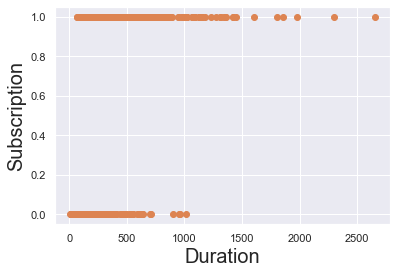

In [9]:
# Create a scatter plot of x1 (Duration, no constant) and y (Subscribed)
plt.scatter(x1,y,color = 'C1')
# Don't forget to label your axes!
plt.xlabel('Duration', fontsize = 20)
plt.ylabel('Subscription', fontsize = 20)
plt.show()

In [10]:
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})
#np.set_printoptions(formatter=None)

In [11]:
results_log.predict()

array([0.25, 0.43, 0.30, 0.86, 0.29, 0.26, 0.22, 0.17, 0.87, 0.32, 0.55,
       0.23, 0.30, 0.39, 0.35, 0.49, 0.29, 0.25, 0.51, 0.83, 0.84, 0.59,
       0.46, 0.40, 0.45, 0.21, 0.42, 0.42, 0.58, 0.26, 0.18, 0.26, 0.86,
       0.43, 0.29, 0.33, 0.98, 0.22, 1.00, 0.63, 0.26, 0.49, 0.31, 0.28,
       0.29, 0.25, 0.20, 0.30, 0.31, 0.47, 0.87, 0.20, 0.22, 0.29, 0.26,
       0.49, 0.28, 0.20, 0.89, 0.54, 0.24, 0.25, 0.90, 0.40, 0.51, 0.46,
       0.28, 0.30, 0.87, 0.24, 0.18, 0.37, 0.47, 0.38, 0.54, 0.26, 0.41,
       0.57, 0.29, 0.21, 0.34, 0.43, 0.30, 0.46, 0.41, 0.97, 0.30, 0.53,
       0.40, 0.23, 0.36, 0.22, 0.37, 0.32, 0.77, 0.81, 0.80, 0.20, 0.98,
       0.30, 0.93, 0.34, 0.89, 0.41, 0.50, 0.50, 0.42, 0.35, 0.42, 0.52,
       0.54, 0.25, 0.31, 0.21, 0.74, 0.18, 0.25, 0.88, 0.60, 0.48, 0.23,
       0.17, 0.40, 0.99, 0.48, 0.96, 0.36, 0.59, 0.34, 0.42, 0.29, 0.33,
       0.48, 0.90, 0.46, 0.68, 0.57, 0.43, 0.43, 0.31, 0.26, 0.23, 0.84,
       0.44, 0.84, 0.65, 0.38, 0.26, 1.00, 0.26, 0.

In [12]:
np.array(data['y'])
results_log.pred_table()

array([[204.00, 55.00],
       [104.00, 155.00]])

In [13]:
cm_df = pd.DataFrame(results_log.pred_table())
cm_df.columns = ['Predicted 0','Predicted 1']
cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
cm_df

Predicted 0  Predicted 1
Actual 0        204.0         55.0
Actual 1        104.0        155.0

In [14]:
cm = np.array(cm_df)
accuracy_train = (cm[0,0]+cm[1,1])/cm.sum()
accuracy_train

0.693050193050193